In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [2]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

In [3]:
class_names = ['Uçak', 'Araba', 'Kuş', 'Kedi', 'Geyik',
               'Köpek', 'Kurbağa', 'At', 'Gemi', 'Kamyon']

In [4]:
train_images.shape

(50000, 32, 32, 3)

In [5]:
train_labels.shape

(50000, 1)

In [6]:
test_images.shape

(10000, 32, 32, 3)

In [7]:
test_labels.shape

(10000, 1)

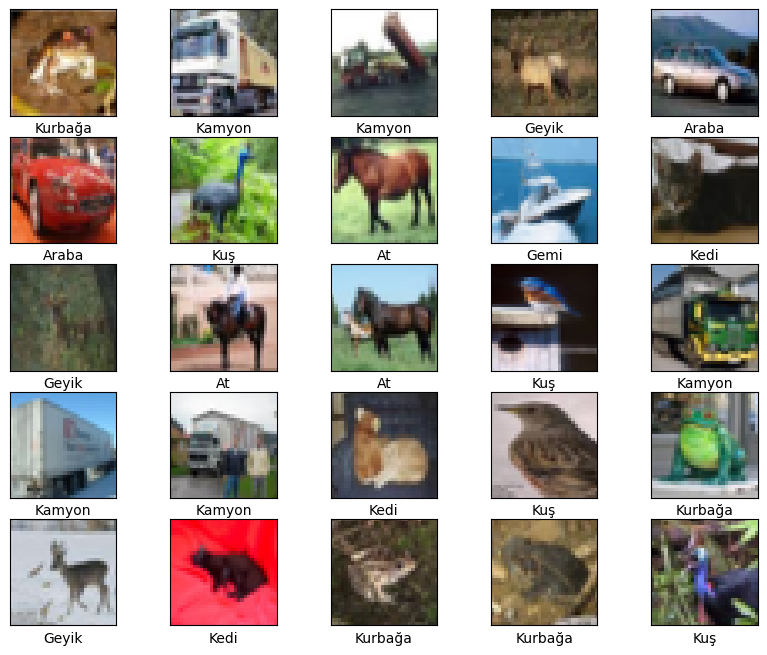

In [8]:
plt.figure(figsize = (10, 8))

for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    plt.xlabel(class_names[train_labels[i][0]])

plt.show()

In [9]:
model = models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (32, 32, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(64, (3, 3), padding='same'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation = 'relu'),
    tf.keras.layers.Dense(10)
])

C:\Users\alpnn\AppData\Local\anaconda3\envs\YoloV8\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [12]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [13]:
history = model.fit(train_images, train_labels, epochs=25, 
                    validation_data=(test_images, test_labels))

Epoch 1/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.2658 - loss: 2.9559 - val_accuracy: 0.4815 - val_loss: 1.4189
Epoch 2/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.4870 - loss: 1.4413 - val_accuracy: 0.5272 - val_loss: 1.3373
Epoch 3/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.5376 - loss: 1.2989 - val_accuracy: 0.5548 - val_loss: 1.2700
Epoch 4/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.5775 - loss: 1.2061 - val_accuracy: 0.5720 - val_loss: 1.2043
Epoch 5/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.5950 - loss: 1.1601 - val_accuracy: 0.5846 - val_loss: 1.2449
Epoch 6/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.6068 - loss: 1.1320 - val_accuracy: 0.6050 - val_loss: 1.1389
Epoch 7/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.6308 - loss: 1.0745 - val_accuracy: 0.6243 - val_loss: 1.0979
Epoch 8/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.6427 - loss: 1.0483 

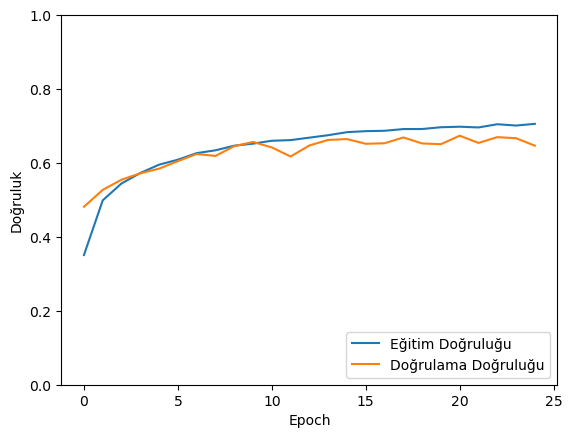

In [14]:
plt.plot(history.history['accuracy'], label='Eğitim Doğruluğu')
plt.plot(history.history['val_accuracy'], label='Doğrulama Doğruluğu')
plt.xlabel('Epoch')
plt.ylabel('Doğruluk')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

In [15]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print('\nTest doğruluğu:', test_acc)

313/313 - 1s - 2ms/step - accuracy: 0.6468 - loss: 1.0907

Test doğruluğu: 0.6467999815940857
